In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import json
import numpy as np
import time
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing.text import Tokenizer, one_hot
from keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud

np.random.seed(100)

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.utils import resample
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#Read dataset
path = 'drive/My Drive/train_ITAmoji.json'
df = pd.read_json(path, lines=True)
print(df.head(3))

                  tid  ...      label
0  622416920701054976  ...  red_heart
1  737712884965363712  ...  red_heart
2  671023999057567744  ...  red_heart

[3 rows x 5 columns]


In [ ]:
df

,tid,uid,created_at,text_no_emoji,label
0,622416920701054976,3115912511,2015-07-18 14:45:32+00:00,#Noiaaa#goro#aspettandolasera @ Porto di Goro ...,red_heart
1,737712884965363712,423498157,2016-05-31 18:30:32+00:00,"e niente, nonostante i casini e gli impegni di...",red_heart
2,671023999057567744,488427533,2015-11-29 17:52:43+00:00,#Faccebuffe #friends #friendship #saturdaynigh...,red_heart
3,650002923393548288,3041411470,2015-10-02 17:42:28+00:00,Un nuovo post è ora online su http://t.co/h6pK...,red_heart
4,628245096694202368,1693227686,2015-08-03 16:44:37+00:00,@vogliosoloriker video e magari iscriverti?Ho ...,red_heart
...,...,...,...,...,...
249995,804387264755363840,1137209850,2016-12-01 18:10:43+00:00,A chi non sceglie mai A chi non rischia mai A ...,rose
249996,553177593654964224,2535236773,2015-01-08 13:13:10+00:00,Io sono CHARLIE ️http://t.co/h93GZPJTds #dress...,rose
249997,962236378372296704,2290924705,2018-02-10 08:06:44+00:00,#10febbraio Voglio ricordare gli innocenti inf...,rose
249998,880248073724850176,1317304885,2017-06-29 02:14:29+00:00,@rominamanguel @animalesoficial @weareblackmil...,rose


In [ ]:
df = df[['text_no_emoji','label','uid']]
#create a new column in the dataframe
df['label_int'] = df['label']
print(df.head(3))
#change values in the column label based on values
df.label_int.replace(to_replace ="red_heart", value = 0, inplace = True)
df.label_int.replace(to_replace ="face_with_tears_of_joy", value = 1, inplace = True)
df.label_int.replace(to_replace ="smiling_face_with_heart_eyes", value = 2, inplace = True)
df.label_int.replace(to_replace ="winking_face", value = 3, inplace = True)
df.label_int.replace(to_replace ="smiling_face_with_smiling_eyes", value = 4, inplace = True)
df.label_int.replace(to_replace ="beaming_face_with_smiling_eyes", value = 5, inplace = True)
df.label_int.replace(to_replace ="grinning_face", value = 6, inplace = True)
df.label_int.replace(to_replace ="face_blowing_a_kiss", value = 7, inplace = True)
df.label_int.replace(to_replace ="smiling_face_with_sunglasses", value = 8, inplace = True)
df.label_int.replace(to_replace ="thumbs_up", value = 9, inplace = True)
df.label_int.replace(to_replace ="rolling_on_the_floor_laughing", value = 10, inplace = True)
df.label_int.replace(to_replace ="thinking_face", value = 11, inplace = True)
df.label_int.replace(to_replace ="blue_heart", value = 12, inplace = True)
df.label_int.replace(to_replace ="winking_face_with_tongue", value = 13, inplace = True)
df.label_int.replace(to_replace ="face_screaming_in_fear", value = 14, inplace = True)
df.label_int.replace(to_replace ="flexed_biceps", value = 15, inplace = True)
df.label_int.replace(to_replace ="face_savoring_food", value = 16, inplace = True)
df.label_int.replace(to_replace ="grinning_face_with_sweat", value = 17, inplace = True)
df.label_int.replace(to_replace ="loudly_crying_face", value = 18, inplace = True)
df.label_int.replace(to_replace ="TOP_arrow", value = 19, inplace = True)
df.label_int.replace(to_replace ="two_hearts", value = 20, inplace = True)
df.label_int.replace(to_replace ="sun", value = 21, inplace = True)
df.label_int.replace(to_replace ="kiss_mark", value = 22, inplace = True)
df.label_int.replace(to_replace ="sparkles", value = 23, inplace = True)
df.label_int.replace(to_replace ="rose", value = 24, inplace = True)
df.head()

                                       text_no_emoji  ...  label_int
0  #Noiaaa#goro#aspettandolasera @ Porto di Goro ...  ...  red_heart
1  e niente, nonostante i casini e gli impegni di...  ...  red_heart
2  #Faccebuffe #friends #friendship #saturdaynigh...  ...  red_heart

[3 rows x 4 columns]


,text_no_emoji,label,uid,label_int
0,#Noiaaa#goro#aspettandolasera @ Porto di Goro ...,red_heart,3115912511,0
1,"e niente, nonostante i casini e gli impegni di...",red_heart,423498157,0
2,#Faccebuffe #friends #friendship #saturdaynigh...,red_heart,488427533,0
3,Un nuovo post è ora online su http://t.co/h6pK...,red_heart,3041411470,0
4,@vogliosoloriker video e magari iscriverti?Ho ...,red_heart,1693227686,0


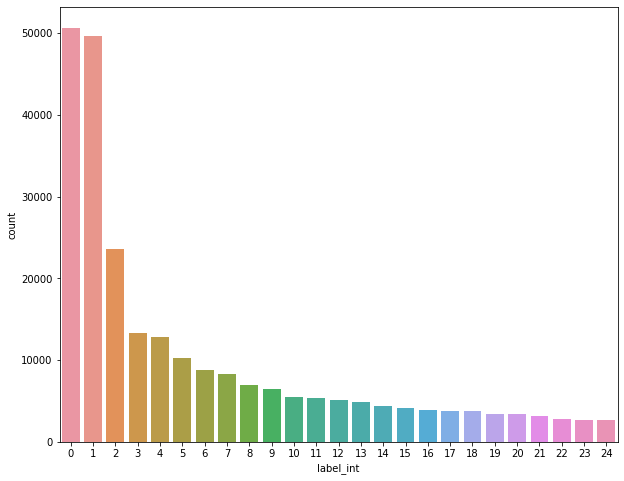

Class repartition :  Counter({0: 50680, 1: 49655, 2: 23627, 3: 13371, 4: 12814, 5: 10278, 6: 8842, 7: 8336, 8: 6998, 9: 6413, 10: 5453, 11: 5412, 12: 5067, 13: 4839, 14: 4441, 15: 4175, 16: 3871, 17: 3796, 18: 3733, 19: 3473, 20: 3417, 21: 3194, 22: 2795, 23: 2668, 24: 2652})


In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(df['label_int'])
plt.show()
print("Class repartition : ", (Counter(df['label_int'])))

In [ ]:
def convert_emojis(text):
    for emot in UNICODE_EMO:
        text = text.replace(emot, "_".join(UNICODE_EMO[emot].replace(",","").replace(":","").split()))
   # for emot in EMOTICONS:
    #    text = re.sub(u'( '+ emot +')', " "+"".join(EMOTICONS[emot].replace(",","").split()), text)
    
    return text

df['text_pulito'] = df['text_no_emoji'].map(lambda x: convert_emojis(x))

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from string import punctuation
import string
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
### Cleaning up the text
def clean_text(text):  
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    ## Remove stop words
    stops = set(stopwords.words("italian"))
    text = [w for w in text if not w in stops and not "http" in w and not "@" in w] 
    text = " ".join(text)    ## Clean the text
    #text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)

    text = re.sub(r",", " ", text)
    text = re.sub(r";", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r"\?", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", "  ", text)
    text = re.sub(r"\+", "  ", text)
    text = re.sub(r"\-", "  ", text)
    text = re.sub(r"\=", "  ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"#", " ", text)
    text = re.sub(r"\"", " ", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r"\:", "  ", text)
    text = re.sub(r"“", "  ", text)
    text = re.sub(r"”", "  ", text)
    text = re.sub(r"\’", "  ", text)
    text = re.sub(r"-", "  ", text)
    text = re.sub(r"\.", "  ", text)
    text = re.sub(r"\(", "  ", text)
    text = re.sub(r"\)", "  ", text)
    text = re.sub(r"«", "  ", text)
    text = re.sub(r"»", "  ", text)
    text = re.sub(r"\€", " euro ", text)
    text = re.sub(r"\*", "  ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", "  ", text)
    text = re.sub(r"\0s", "0", text)
    
    #specifici per il dataset
    text = re.sub(r" x ", " per ", text)  
    text = re.sub(r" nn ", " non ", text)
    text = re.sub(r" co ", " con ", text)
    text = re.sub(r"•", " ", text)
    text = re.sub(r"—", " ", text)
    text = re.sub('[\W_]+', ' ', text) #♥️
    #text = re.sub('♥️', ' ', text)
    #text = re.sub('❤', ' ', text)
    #text = re.sub('✨', ' ', text)
    #text = re.sub('►', ' ', text)
    text = re.sub('&lt;3', ' ', text)
    text = re.sub(' rt ', ' ', text)
    
    text = text.split()
    text = [w for w in text if not w in stops]
    
    text = " ".join(text)    ## Clean the text

    ## Stemming 
    #text = text.split()
    #stemmer = SnowballStemmer('italian')
    #stemmed_words = [stemmer.stem(word) for word in text] 
    #text = " ".join(stemmed_words)
    return text

In [ ]:
df['text_pulito'] = df['text_no_emoji'].map(lambda x: clean_text(x))

In [ ]:
# apply the above function to df['text']
df['text_pulito'] = df['text_pulito'].map(lambda x: clean_text(x))

In [ ]:
print('1)frase originale: ',df['text_no_emoji'][0])
print('1)frase ripulita: ',df['text_pulito'][0])
print('\n')
print('2)frase originale: ',df['text_no_emoji'][13])
print('2)frase ripulita: ',df['text_pulito'][13])
print('\n')
print('3)frase originale: ',df['text_no_emoji'][238927])
print('3)frase ripulita: ',df['text_pulito'][238927])
print('\n')
print('4)frase originale: ',df['text_no_emoji'][145646])
print('4)frase ripulita: ',df['text_pulito'][145646])

1)frase originale:  #Noiaaa#goro#aspettandolasera @ Porto di Goro https://t.co/JbSJ6ad6YM
1)frase ripulita:  noiaaa goro aspettandolasera porto goro


2)frase originale:  Quanto amo questa canzone ️ #ModenaPark
2)frase ripulita:  amo canzone modenapark


3)frase originale:  ● musino riposato ● ️ #work @ Stazione Leopolda https://t.co/qycgiaU0g2
3)frase ripulita:  musino riposato work stazione leopolda


4)frase originale:  @maurobiani @ilmanifesto Sei un genio
4)frase ripulita:  genio


In [ ]:
#delete empty row
df = df[df['text_pulito'] != '']
df

,text_no_emoji,label,uid,label_int,text_pulito
0,#Noiaaa#goro#aspettandolasera @ Porto di Goro ...,red_heart,3115912511,0,noiaaa goro aspettandolasera porto goro
1,"e niente, nonostante i casini e gli impegni di...",red_heart,423498157,0,niente nonostante casini impegni tutte amiche ...
2,#Faccebuffe #friends #friendship #saturdaynigh...,red_heart,488427533,0,faccebuffe friends friendship saturdaynight ar...
3,Un nuovo post è ora online su http://t.co/h6pK...,red_heart,3041411470,0,nuovo post ora online tante novità arrivo
4,@vogliosoloriker video e magari iscriverti?Ho ...,red_heart,1693227686,0,video magari iscriverti molte cose mente grazi...
...,...,...,...,...,...
249995,A chi non sceglie mai A chi non rischia mai A ...,rose,1137209850,24,sceglie mai rischia mai sbaglia mai rose
249996,Io sono CHARLIE ️http://t.co/h93GZPJTds #dress...,rose,2535236773,24,charlie dresscorner charlie paris france
249997,#10febbraio Voglio ricordare gli innocenti inf...,rose,2290924705,24,10febbraio voglio ricordare innocenti infoibat...
249998,@rominamanguel @animalesoficial @weareblackmil...,rose,1317304885,24,bella romina


In [ ]:
df_features= df.groupby('uid')['label_int'].value_counts().unstack().fillna(0).astype('int64')
df_features

label_int,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
uid,,,,,,,,,,,,,,,,,,,,,,,,,
11847,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12243,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31253,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
42173,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
63533,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992562998073004032,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
992798072991252480,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
992854744933781504,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_merge = pd.merge(df, df_features, on=['uid', 'uid'])

In [ ]:
df_f= df_merge[['text_pulito','label','label_int','uid',0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]]
df_f

,text_pulito,label,label_int,uid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,noiaaa goro aspettandolasera porto goro,red_heart,0,3115912511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,wee va mui bien page taggata veramente fantast...,two_hearts,20,3115912511,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,niente nonostante casini impegni tutte amiche ...,red_heart,0,423498157,24,21,10,0,0,0,0,0,4,0,0,0,0,0,6,3,0,0,16,2,2,1,0,1,0
3,niente immagino ragazza ricoverata lì trova so...,red_heart,0,423498157,24,21,10,0,0,0,0,0,4,0,0,0,0,0,6,3,0,0,16,2,2,1,0,1,0
4,sempre pacco regalo,red_heart,0,423498157,24,21,10,0,0,0,0,0,4,0,0,0,0,0,6,3,0,0,16,2,2,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249393,buon compleanno,rose,24,926755904485240832,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
249394,buongiorno te,rose,24,907220181549711360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
249395,auguri tutte donne 8marzo festadelladonna,rose,24,934075873619308544,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
249396,buongiorno annalisa auguri felice festa donna,rose,24,841289941,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2


In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_f, test_size=0.2)

In [ ]:
df_train

,text_pulito,label,label_int,uid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
128664,forza juve,flexed_biceps,15,179340943,2,4,1,2,4,0,2,1,0,2,0,1,0,0,3,1,0,0,1,1,0,0,0,2,0
11879,golosi veggies pancakes cacao iniziare meglio ...,smiling_face_with_smiling_eyes,4,2194754801,14,3,3,2,9,0,0,3,1,0,6,0,0,1,1,0,1,0,0,1,0,1,0,0,0
21670,cosa leggera dopo pizza granbarfranco,winking_face_with_tongue,13,918925153,82,3,19,1,0,7,0,2,1,1,0,0,0,52,6,0,0,1,0,0,0,8,0,0,0
79575,omaggio omaggio assembleaigersitalia2016 rieti,red_heart,0,433050727,2,0,1,1,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,0,0,1,0,0,0
39408,novità nuova shirt 22 00 euro disponibile nero...,smiling_face_with_heart_eyes,2,3193393107,11,29,246,6,1,3,2,5,1,0,1,0,0,22,20,2,0,0,0,23,0,3,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61875,futuro pompiere oval lingotto,grinning_face,6,415900150,1,2,1,0,0,0,1,1,0,0,0,0,0,1,2,0,0,0,0,0,0,0,0,0,0
41316,tirato indovinare negata morire certe cose bac...,face_with_tears_of_joy,1,531125755,8,9,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0
161206,mancitynapoli diawara incontra tunnel idolo ya...,smiling_face_with_smiling_eyes,4,2651904048,0,38,13,6,1,0,0,0,1,0,0,0,1,0,0,3,0,14,1,0,0,0,0,0,0
182010,ahah andato curiosare addirittura 277 scelta,thumbs_up,9,945366054490050560,0,5,5,0,6,3,6,0,10,23,78,48,0,0,0,5,0,5,0,2,1,0,0,0,0


In [ ]:
X_tr = df_train.iloc[:,4:29].values
X_te = df_test.iloc[:,4:29].values
X_te

array([[ 6,  1,  0, ...,  0,  0,  0],
       [13,  7,  4, ...,  0,  0,  0],
       [ 9, 54,  2, ...,  0,  0,  0],
       ...,
       [ 4, 20,  3, ...,  0,  0,  0],
       [ 0, 47,  0, ...,  0,  0,  0],
       [ 2, 91, 18, ...,  0,  0,  0]])

In [ ]:
X_train = df_train.text_pulito
X_test = df_test.text_pulito

X_train_feature = X_tr
X_test_feature = X_te

y_train = df_train.label_int
y_test = df_test.label_int

In [ ]:
print('Training class distributions summary: {}'.format(Counter(y_train)))
print('Test class distributions summary: {}'.format(Counter(y_test)))

Training class distributions summary: Counter({0: 40541, 1: 39491, 2: 18834, 3: 10684, 4: 10182, 5: 8241, 6: 7120, 7: 6646, 8: 5629, 9: 5129, 10: 4377, 11: 4342, 12: 4044, 13: 3846, 14: 3491, 15: 3333, 16: 3068, 17: 3035, 18: 2949, 19: 2787, 20: 2723, 21: 2543, 22: 2243, 23: 2124, 24: 2122})
Test class distributions summary: Counter({0: 10076, 1: 10006, 2: 4752, 3: 2632, 4: 2595, 5: 2012, 6: 1698, 7: 1671, 8: 1353, 9: 1263, 10: 1057, 11: 1047, 12: 1020, 13: 975, 14: 936, 15: 837, 16: 802, 18: 766, 17: 753, 20: 687, 19: 674, 21: 650, 22: 548, 23: 543, 24: 529})


In [ ]:
def make_tokenizer(texts):
    from keras.preprocessing.text import Tokenizer
    t = Tokenizer()
    t.fit_on_texts(texts)
    return t

In [ ]:
lista_testo = df_f['text_pulito'].fillna('').to_list()
lista_testo = [str(i) for i in lista_testo]

In [ ]:
tokenizer = make_tokenizer(df_f['text_pulito'])

In [ ]:
X_train = tokenizer.texts_to_sequences(df_train['text_pulito'])
X_test = tokenizer.texts_to_sequences(df_test['text_pulito'])


In [ ]:
len_voc  = len(tokenizer.word_index) + 1 # adding 1 because of reserverd 0 index
print("vocabulary size: ", len_voc)

maxlen_train = max( len(x) for x in X_train)
maxlen_test = max( len(x) for x in X_test)

print("maxlen train dataset: ", maxlen_train)
print("maxlen test dataset: ", maxlen_test)
max_len = 25

vocabulary size:  152759
maxlen train dataset:  22
maxlen test dataset:  25


In [ ]:
from keras.preprocessing.sequence import pad_sequences

X_train = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='post')

In [ ]:
y_train = df_train['label_int'].values
y_test = df_test['label_int'].values

In [ ]:
from keras.utils import to_categorical
y_train_cat = to_categorical(y_train,25)
y_test_cat= to_categorical(y_test,25)

In [ ]:
y_train_cat

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
df_train['text_pulito'][10]

'però bello'

In [ ]:
tokenizer.texts_to_sequences('culona')


[[], [580], [], [], [303], []]

In [ ]:
X_train

array([[   90,   240,     0, ...,     0,     0,     0],
       [ 8126, 64243,  6754, ...,     0,     0,     0],
       [   23,  3596,    37, ...,     0,     0,     0],
       ...,
       [18181, 31642,  4561, ...,     0,     0,     0],
       [  863,   978, 23987, ...,     0,     0,     0],
       [91648,  2106,   191, ...,     0,     0,     0]], dtype=int32)

In [ ]:
with open("/content/drive/My Drive/embeddings.vec", "r") as ins:
  array = []
  for line in ins:
    array.append(line)
  
array = array[1:]
word_embedder = dict()
for el in array:
  word_array = el.split(sep=" ")
  values = []
  for value in word_array[1:-1]:
    values.append(float(value))
  word_embedder[word_array[0]]= values

print('vettori trovati: ',len(word_embedder))
print('vettore per la parola "buongiorno":')
print(word_embedder["buongiorno"])

vettori trovati:  1173127
vettore per la parola "buongiorno":
[-0.42796, -0.27427, -0.26669, 0.20342, 0.075293, 0.40008, -0.24121, -0.12603, -0.31635, 0.42902, -0.22592, -0.53956, 0.56822, -0.30026, -0.18446, -0.088367, -0.11481, 0.027399, -0.34573, 0.23588, 0.063126, -0.082184, -0.36246, -0.14178, 0.19619, -0.04596, -0.19408, 0.19945, -0.090471, 0.51436, 0.38475, 0.11413, -0.28427, -0.071697, 0.09936, -0.26537, -0.34247, -0.40442, -0.074626, 0.24123, 0.045693, -0.3081, -0.39334, 0.44426, 0.17339, -0.38771, 0.39896, 0.67075, 0.25187, -0.053918, -0.24634, 0.49793, 0.40529, 0.0024158, 0.10269, 0.26622, -0.1466, 0.18717, 0.21863, 0.2537, 0.33323, 0.01371, 0.23325, -0.0092188, 0.11024, 0.65207, 0.36633, 0.16951, -0.11397, -0.096092, -0.86539, -0.22932, -0.13951, -0.31495, 0.271, 0.010508, 0.20947, 0.09442, 0.37677, 0.015595, 0.22908, 0.11139, 0.7105, 0.30741, -0.65215, 0.40109, 0.61314, 0.43583, 0.88781, 0.33354, 0.50502, 0.20713, 0.14646, 0.090021, -0.28759, 0.013162, 0.069668, -0.31478, 

In [ ]:
def embedding_matrix_process(vocab_size, embedding_words):
  embedding_matrix = np.zeros((vocab_size,100))
  for word, index in tokenizer.word_index.items():
    embedding_vector = embedding_words.get(word)
    if embedding_vector is not None:
      embedding_matrix[index]= embedding_vector
  return embedding_matrix
  pesi = embedding_matrix_process(len_voc, word_embedder)

In [ ]:
pesi = embedding_matrix_process(len_voc, word_embedder)

In [ ]:
print('parola nel dizionario con indice 2: ',list(tokenizer.word_index.keys())
[list(tokenizer.word_index.values()).index(2)])
print('vettore riferito alla parola "buongiorno": ')
print(pesi[2])

parola nel dizionario con indice 2:  buongiorno
vettore riferito alla parola "buongiorno": 
[-0.42796   -0.27427   -0.26669    0.20342    0.075293   0.40008
 -0.24121   -0.12603   -0.31635    0.42902   -0.22592   -0.53956
  0.56822   -0.30026   -0.18446   -0.088367  -0.11481    0.027399
 -0.34573    0.23588    0.063126  -0.082184  -0.36246   -0.14178
  0.19619   -0.04596   -0.19408    0.19945   -0.090471   0.51436
  0.38475    0.11413   -0.28427   -0.071697   0.09936   -0.26537
 -0.34247   -0.40442   -0.074626   0.24123    0.045693  -0.3081
 -0.39334    0.44426    0.17339   -0.38771    0.39896    0.67075
  0.25187   -0.053918  -0.24634    0.49793    0.40529    0.0024158
  0.10269    0.26622   -0.1466     0.18717    0.21863    0.2537
  0.33323    0.01371    0.23325   -0.0092188  0.11024    0.65207
  0.36633    0.16951   -0.11397   -0.096092  -0.86539   -0.22932
 -0.13951   -0.31495    0.271      0.010508   0.20947    0.09442
  0.37677    0.015595   0.22908    0.11139    0.7105     0.307

In [ ]:
pesi[2]

array([-0.42796  , -0.27427  , -0.26669  ,  0.20342  ,  0.075293 ,
        0.40008  , -0.24121  , -0.12603  , -0.31635  ,  0.42902  ,
       -0.22592  , -0.53956  ,  0.56822  , -0.30026  , -0.18446  ,
       -0.088367 , -0.11481  ,  0.027399 , -0.34573  ,  0.23588  ,
        0.063126 , -0.082184 , -0.36246  , -0.14178  ,  0.19619  ,
       -0.04596  , -0.19408  ,  0.19945  , -0.090471 ,  0.51436  ,
        0.38475  ,  0.11413  , -0.28427  , -0.071697 ,  0.09936  ,
       -0.26537  , -0.34247  , -0.40442  , -0.074626 ,  0.24123  ,
        0.045693 , -0.3081   , -0.39334  ,  0.44426  ,  0.17339  ,
       -0.38771  ,  0.39896  ,  0.67075  ,  0.25187  , -0.053918 ,
       -0.24634  ,  0.49793  ,  0.40529  ,  0.0024158,  0.10269  ,
        0.26622  , -0.1466   ,  0.18717  ,  0.21863  ,  0.2537   ,
        0.33323  ,  0.01371  ,  0.23325  , -0.0092188,  0.11024  ,
        0.65207  ,  0.36633  ,  0.16951  , -0.11397  , -0.096092 ,
       -0.86539  , -0.22932  , -0.13951  , -0.31495  ,  0.271 

In [ ]:
from google.colab import files

df.to_csv('df.csv')
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy={2:10800, 1: 11000, 0: 11000})
X_over, y_over = undersample.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy={24: 3000, 23: 3000, 22: 3000, 21: 3700, 20: 3900, 19: 3900, 18: 4200, 17: 4200, 16: 4200, 15: 4600, 14: 5000, 13: 5300, 12: 5500, 11: 5900, 10: 5900, 9: 7000, 8: 7000, 7: 7000})
X_res, y_res = sm.fit_resample(X_over, y_over)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

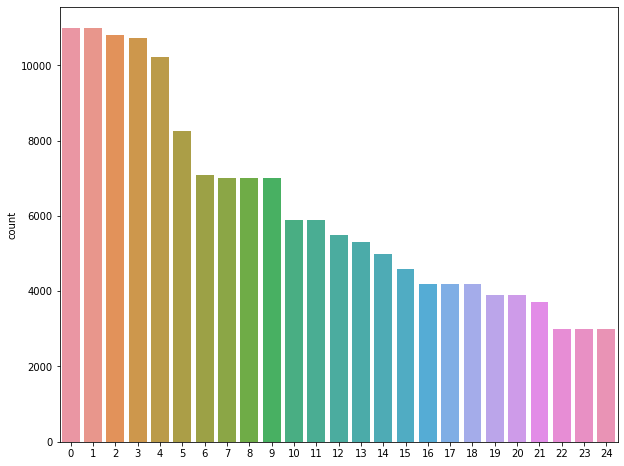

Class repartition :  Counter({0: 11000, 1: 11000, 2: 10800, 3: 10719, 4: 10217, 5: 8266, 6: 7098, 7: 7000, 8: 7000, 9: 7000, 10: 5900, 11: 5900, 12: 5500, 13: 5300, 14: 5000, 15: 4600, 16: 4200, 17: 4200, 18: 4200, 19: 3900, 20: 3900, 21: 3700, 22: 3000, 23: 3000, 24: 3000})


In [ ]:
plt.figure(figsize = (10, 8))
sns.countplot(y_res)
plt.show()
print("Class repartition : ", (Counter(y_res)))

In [ ]:
X_res.shape

(151501, 25)

In [ ]:
print('Training class distributions summary: {}'.format(Counter(y_train)))
print('Test class distributions summary: {}'.format(Counter(y_over)))

Training class distributions summary: Counter({0: 40638, 1: 39735, 2: 18903, 3: 10652, 4: 10327, 5: 8183, 6: 7039, 7: 6640, 8: 5595, 9: 5164, 10: 4390, 11: 4304, 12: 4090, 13: 3863, 14: 3581, 15: 3327, 16: 3121, 17: 3048, 18: 2936, 19: 2775, 20: 2734, 21: 2547, 22: 2195, 24: 2117, 23: 2096})
Test class distributions summary: Counter({3: 10652, 4: 10327, 0: 10000, 1: 10000, 2: 9000, 5: 8183, 6: 7039, 7: 6640, 8: 5595, 9: 5164, 10: 4390, 11: 4304, 12: 4090, 13: 3863, 14: 3581, 15: 3327, 16: 3121, 17: 3048, 18: 2936, 19: 2775, 20: 2734, 21: 2547, 22: 2195, 24: 2117, 23: 2096})


In [ ]:
from keras.layers import LSTM, Bidirectional
from keras import regularizers
from keras.utils.vis_utils import plot_model

In [ ]:
#modello features 4
lstm_output_shape = 256
embedding_dim = 100

input =  keras.layers.Input(shape=(max_len,), name='main_input')
history =  keras.layers.Input(shape=(X_train_feature.shape[1],), name='history_input')

model =  keras.layers.Embedding(input_dim=len_voc,
                        output_dim=embedding_dim,
                        weights=[pesi],
                        input_length=max_len,
                        trainable=False,
                        embeddings_regularizer=regularizers.l2(0.000001))(input)
model = Dropout(0.4)(model)

model = Bidirectional(LSTM(lstm_output_shape, return_sequences=False))(model)

h_model = history
for i in range(2):
  h_model = Dense(256, activation='tanh', kernel_regularizer=regularizers.l2(0.00001))(h_model)

model =  keras.layers.Concatenate()([model, h_model])
model = Dense(25, activation='softmax')(model)
model =  keras.Model([input, history], model)

model.compile(loss='categorical_crossentropy',
                  optimizer="adam",
                  metrics=['accuracy'])
model.summary()


Model: "functional_11"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding_7 (Embedding)         (None, 25, 100)      15275900    main_input[0][0]                 
__________________________________________________________________________________________________
history_input (InputLayer)      [(None, 25)]         0                                            
__________________________________________________________________________________________________
dropout_6 (Dropout)             (None, 25, 100)      0           embedding_7[0][0]                
______________________________________________________________________________________

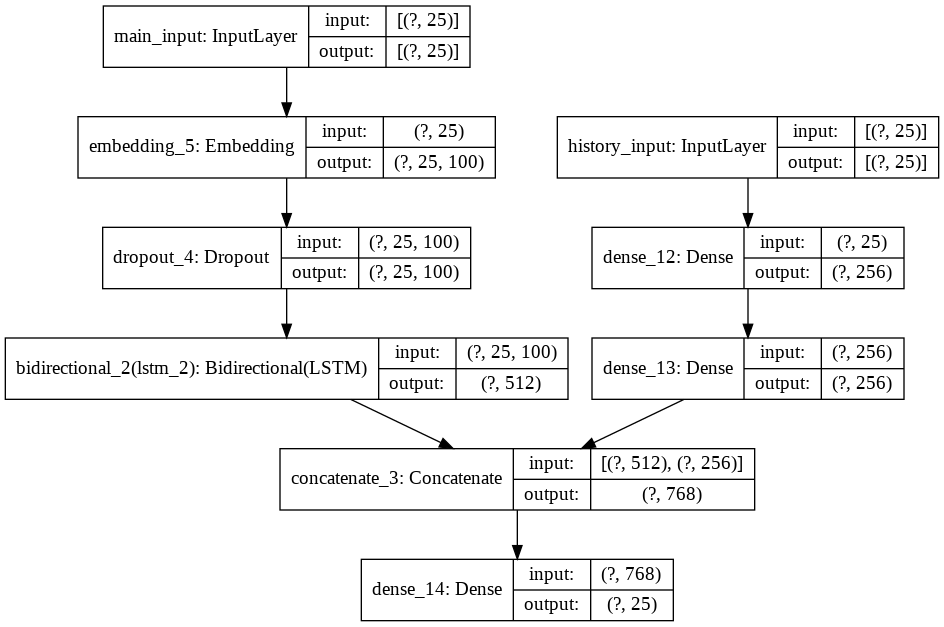

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
#modello features 2
embedding_dim = 100

input_testo = keras.layers.Input(shape=(max_len,))

x= keras.layers.Embedding(len_voc,embedding_dim, input_length= max_len, weights= [pesi],
                          trainable = False )(input_testo)
y= Bidirectional(LSTM(512, return_sequences=False, recurrent_dropout=0.2))(x)
input_features = keras.layers.Input(shape=(X_train_feature.shape[1],))

model_final= keras.layers.Concatenate()([y, input_features])
model_final= keras.layers.Dense(256,activation='relu',bias_initializer='zeros')(model_final)
model_final= keras.layers.Dense(256,activation='relu',bias_initializer='zeros')(model_final)
model_final= keras.layers.Dense(25,activation='softmax')(model_final)
model_final= keras.Model([input_testo, input_features],model_final)
model_final.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

model_final.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 25, 100)      15275900    input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 1024)         2510848     embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 25)]         0                                            
_______________________________________________________________________________________

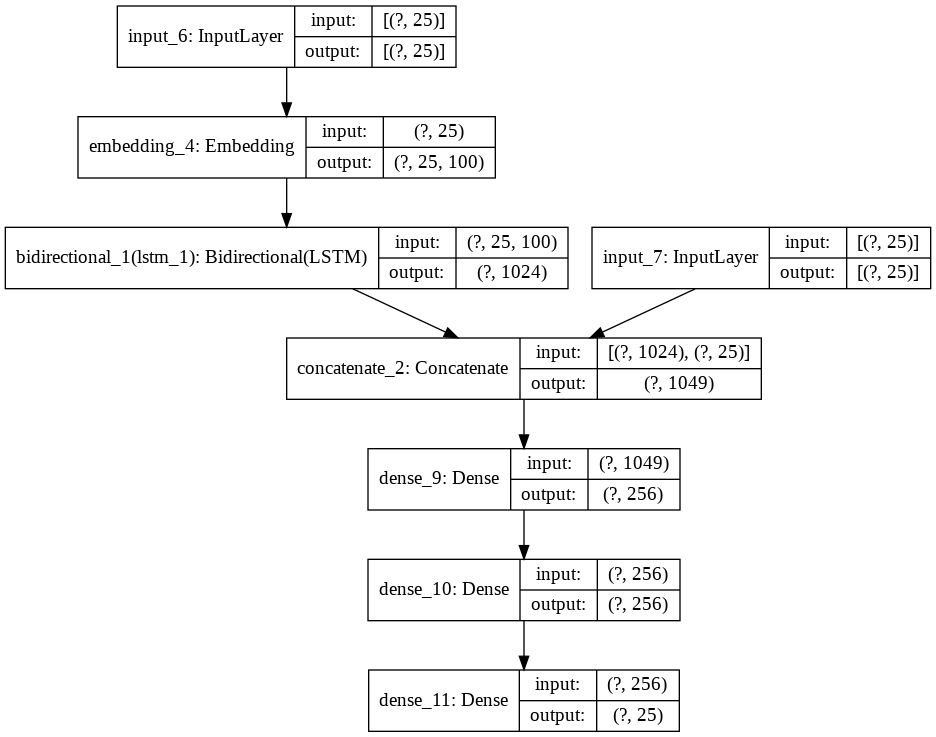

In [ ]:
plot_model(model_final, to_file='model_plot_final.png', show_shapes=True, show_layer_names=True)


In [ ]:
embedding_dim = 100

input_testo = keras.layers.Input(shape=(max_len,))

x= keras.layers.Embedding(len_voc,embedding_dim, input_length= max_len, weights= [pesi], trainable = False)(input_testo)
flatten = keras.layers.Flatten()(x)
input_features = keras.layers.Input(shape=(X_train_feature.shape[1],))

model_dense2= keras.layers.Concatenate()([flatten, input_features])
model_dense2= keras.layers.Dense(128,activation='relu',bias_initializer='zeros')(model_dense2)
model_dense2= keras.layers.Dense(64,activation='relu',bias_initializer='zeros')(model_dense2)
model_dense2= keras.layers.Dense(25,activation='softmax',bias_initializer='zeros')(model_dense2)
model_dense2= keras.Model([input_testo, input_features],model_dense2)
model_dense2.compile(loss="binary_crossentropy", optimizer="adam", metrics = ["accuracy"])

model_dense2.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 25)]         0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 25, 100)      15275900    input_1[0][0]                    
__________________________________________________________________________________________________
flatten_1 (Flatten)             (None, 2500)         0           embedding_1[0][0]                
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 25)]         0                                            
_______________________________________________________________________________________

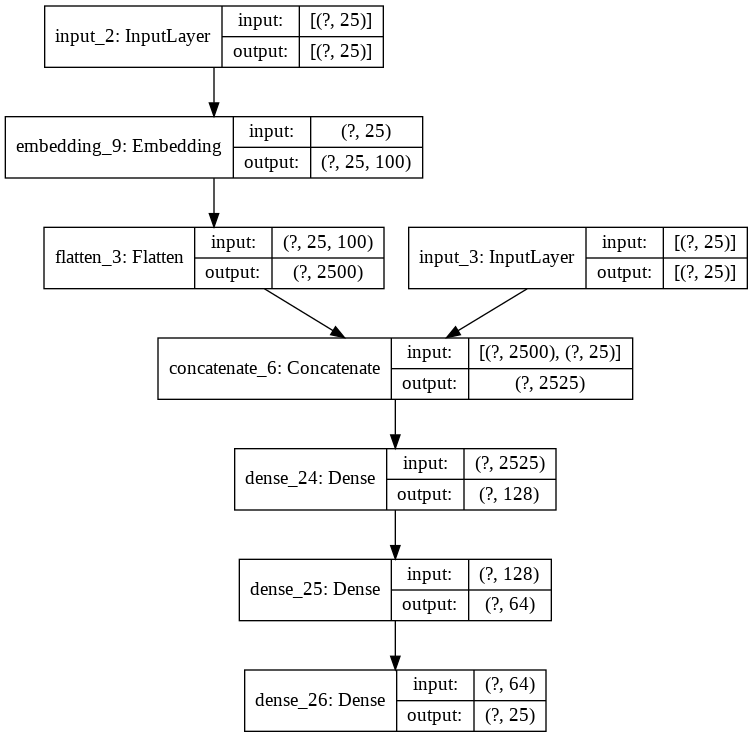

In [ ]:
plot_model(model_dense2, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True)


In [ ]:
#TO DO:
# Define MLP architecture
embedding_dim = 100

model_dense = tf.keras.Sequential()

model_dense.add(tf.keras.layers.Embedding(len_voc,embedding_dim, input_length= max_len, weights= [pesi], trainable = False )) 

model_dense.add(tf.keras.layers.Flatten()) #risultato embedding è una matrice in 2d 
model_dense.add(tf.keras.layers.Dense(256, activation="relu"))
#model_dense.add(Bidirectional(LSTM(512, return_sequences=True, recurrent_dropout=0.2)))
model_dense.add(tf.keras.layers.Dropout(0.2))
model_dense.add(tf.keras.layers.Dense(128, activation="relu"))
#model_dense.add(Bidirectional(LSTM(256, recurrent_dropout=0.2)))
model_dense.add(tf.keras.layers.Dropout(0.3))
model_dense.add(tf.keras.layers.Dense(25, activation="softmax"))


#fine arcchiettura del modello

model_dense.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_dense.summary()


# TO DO: compile and summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 100)           15275900  
_________________________________________________________________
flatten (Flatten)            (None, 2500)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               640256    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 25)                3

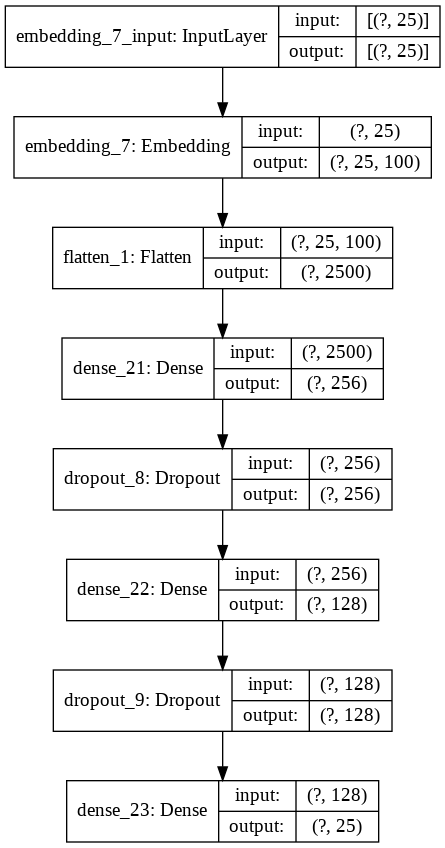

In [ ]:
plot_model(model_dense, to_file='model_plot_1.png', show_shapes=True, show_layer_names=True)


In [ ]:
X_train_feature.shape

(200000, 25)

In [ ]:
history = model_dense.fit(np.array(X_res), np.array(y_res), epochs=10,verbose=True, validation_data=(np.array(X_test), np.array(y_test)),batch_size=128)


Epoch 1/10
1212/1212 [==============================] - 7s 5ms/step - loss: 2.8569 - accuracy: 0.1628 - val_loss: 2.5273 - val_accuracy: 0.2877
Epoch 2/10
1212/1212 [==============================] - 6s 5ms/step - loss: 2.7247 - accuracy: 0.1977 - val_loss: 2.5129 - val_accuracy: 0.2937
Epoch 3/10
1212/1212 [==============================] - 6s 5ms/step - loss: 2.6603 - accuracy: 0.2126 - val_loss: 2.4888 - val_accuracy: 0.2881
Epoch 4/10
1212/1212 [==============================] - 7s 6ms/step - loss: 2.5996 - accuracy: 0.2281 - val_loss: 2.4693 - val_accuracy: 0.3013
Epoch 5/10
1212/1212 [==============================] - 8s 6ms/step - loss: 2.5377 - accuracy: 0.2442 - val_loss: 2.5328 - val_accuracy: 0.2665
Epoch 6/10
1212/1212 [==============================] - 6s 5ms/step - loss: 2.4780 - accuracy: 0.2609 - val_loss: 2.5314 - val_accuracy: 0.2714
Epoch 7/10
1212/1212 [==============================] - 6s 5ms/step - loss: 2.4223 - accuracy: 0.2731 - val_loss: 2.5709 - val_accuracy:

In [ ]:
history = model_final.fit(x=[X_train,X_train_feature], y= np.array(y_train_cat), epochs=10,verbose=True, validation_data=([X_test,X_test_feature], np.array(y_test_cat)),batch_size=128)

Epoch 1/10
1559/1559 [==============================] - 457s 293ms/step - loss: 0.0960 - accuracy: 0.5461 - val_loss: 0.0808 - val_accuracy: 0.5916
Epoch 2/10
1559/1559 [==============================] - 460s 295ms/step - loss: 0.0766 - accuracy: 0.6020 - val_loss: 0.0755 - val_accuracy: 0.6059
Epoch 3/10
1559/1559 [==============================] - 443s 284ms/step - loss: 0.0732 - accuracy: 0.6123 - val_loss: 0.0743 - val_accuracy: 0.6054
Epoch 4/10
1559/1559 [==============================] - 431s 276ms/step - loss: 0.0692 - accuracy: 0.6206 - val_loss: 0.0698 - val_accuracy: 0.6086
Epoch 5/10
1559/1559 [==============================] - 443s 284ms/step - loss: 0.0659 - accuracy: 0.6309 - val_loss: 0.0698 - val_accuracy: 0.6086
Epoch 6/10
1559/1559 [==============================] - 450s 289ms/step - loss: 0.0637 - accuracy: 0.6444 - val_loss: 0.0706 - val_accuracy: 0.6073
Epoch 7/10
1559/1559 [==============================] - 441s 283ms/step - loss: 0.0610 - accuracy: 0.6607 - val_

In [ ]:
#TO DO : evaluate the model 
loss, accuracy = model.evaluate([X_test,X_test_feature], np.array(y_test_cat), verbose= 1)

1559/1559 [==============================] - 46s 30ms/step - loss: 1.2462 - accuracy: 0.6222


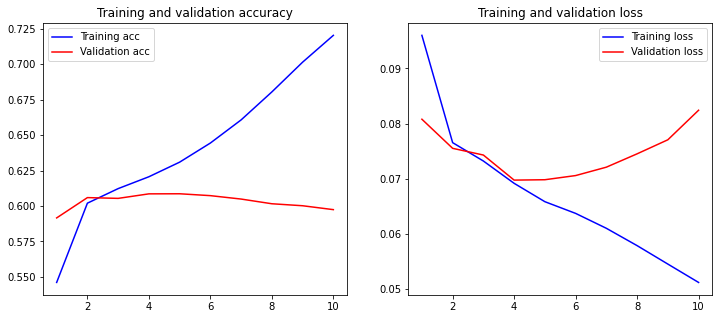

In [ ]:
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_history(history)

In [ ]:
!pip install mlxtend

In [ ]:
pip install mlxtend --upgrade --no-deps

     |████████████████████████████████| 1.3MB 7.4MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import mlxtend                                                          
print(mlxtend.__version__) 

0.17.3


[6]
1


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f590e7f0198>)

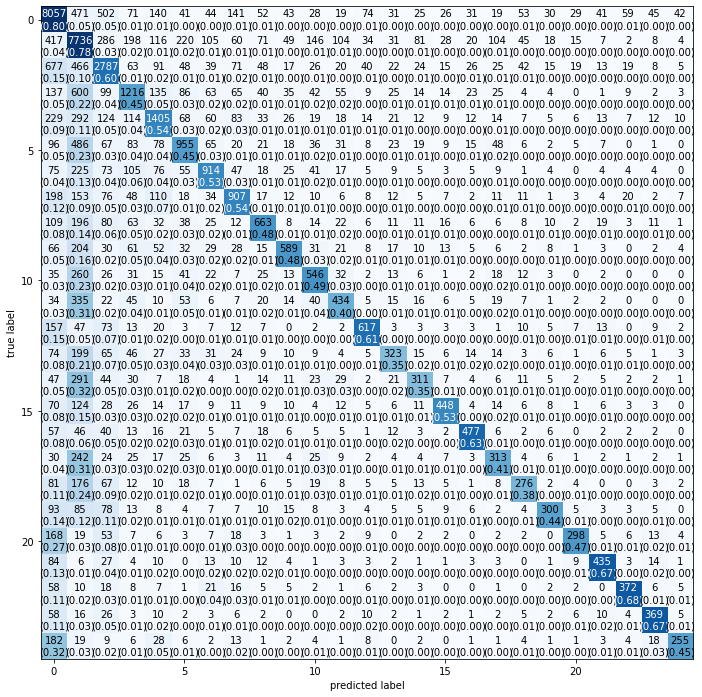

In [ ]:
y_pred = model.predict([X_test,X_test_feature])
predizione_final2 = np.argmax(y_pred, axis=1)
import numpy as np
print(y_test[:1])
rounded_labels=np.argmax(y_test_cat, axis=1)
print(rounded_labels[1])
mat = confusion_matrix(rounded_labels, predizione_final2)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), show_normed=True)




Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
1


(<Figure size 864x864 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f59601105f8>)

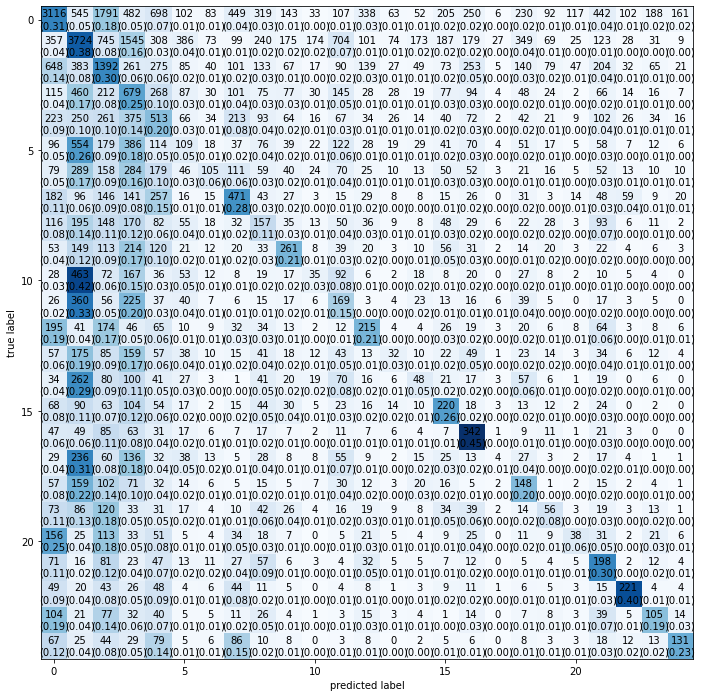

In [ ]:
y_pred = model_dense.predict_classes(X_test)
import numpy as np
rounded_labels=np.argmax(y_test_cat, axis=1)
print(rounded_labels[1])
mat = confusion_matrix(rounded_labels, y_pred)
plot_confusion_matrix(conf_mat=mat, figsize=(12, 12), show_normed=True)


In [ ]:

from sklearn import metrics

In [ ]:
print(metrics.classification_report(rounded_labels, predizione_final2))

              precision    recall  f1-score   support

           0       0.71      0.80      0.75     10114
           1       0.61      0.78      0.68      9905
           2       0.59      0.60      0.60      4626
           3       0.53      0.45      0.49      2706
           4       0.58      0.54      0.56      2613
           5       0.53      0.45      0.49      2099
           6       0.60      0.53      0.56      1724
           7       0.58      0.54      0.56      1682
           8       0.59      0.48      0.53      1372
           9       0.64      0.48      0.55      1237
          10       0.50      0.49      0.50      1112
          11       0.50      0.40      0.44      1098
          12       0.69      0.61      0.65      1019
          13       0.53      0.35      0.42       933
          14       0.52      0.35      0.41       898
          15       0.70      0.53      0.60       849
          16       0.71      0.63      0.67       754
          17       0.46    